In [1]:
from scipy import signal
from scipy.io.wavfile import read
from IPython.display import Audio
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt

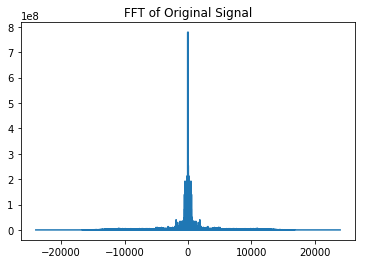

In [2]:
Fs, data = read('test_audio.wav')
data = data[:, 0]
length = len(data)
fourier = fft.fft(data,length)
fourier = fft.fftshift(fourier)

w = 2*np.pi*(fft.fftfreq(length))
w = fft.fftshift(w)
time = Fs * w /(2*np.pi)
plt.title("FFT of Original Signal")
plt.plot(time,abs(fourier))
plt.show()


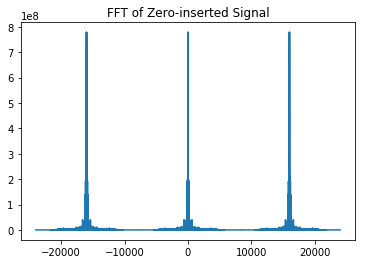

In [3]:
up_ratio = 3

upsample = np.zeros(up_ratio*length)
for i in range(length):
    upsample[i*up_ratio] = data[i]
    
data = upsample
length = len(data)
fourier = fft.fft(data,length)
fourier = fft.fftshift(fourier)

w = 2*np.pi*(fft.fftfreq(length))
w = fft.fftshift(w)
time = Fs * w /(2*np.pi)
plt.title("FFT of Zero-inserted Signal")
plt.plot(time,abs(fourier))
plt.show()
    

#### Answer:
1. The upsampled signal's FFT is the same as the original signal's FFT but with shorter period.
2. We can filter the original isgnal by a low pass filter according to Nyquist's criteria to prevent aliasing.

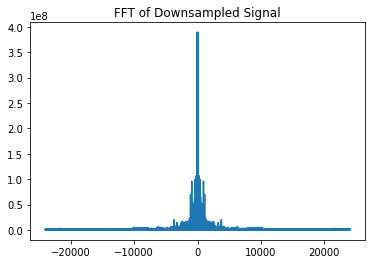

In [4]:
down_ratio = 2
Fs, data = read('test_audio.wav')
data = data[:, 0]
length = len(data)
downsample = np.zeros(int(length/down_ratio))
length = len(downsample)
for i in range(length):
    downsample[i] = data[down_ratio*i]
    
data = downsample
length = len(data)
fourier = fft.fft(data,length)
fourier = fft.fftshift(fourier)

w = 2*np.pi*(fft.fftfreq(length))
w = fft.fftshift(w)
time = Fs * w /(2*np.pi)
plt.title("FFT of Downsampled Signal")
plt.plot(time,abs(fourier))
plt.show()

#### Answer:
1. The downsampled signal's FFT is the same as the original signal's FFT but with longer period.
2. We can filter the original isgnal by controlling the downsample ratio, making sure bandwidth*ratio is smaller than 2*pi.

In [5]:
Fs, data = read('test_audio.wav')
data = data[:, 0]

up_ratio = 1
down_ratio = 2

output = signal.resample_poly(data, up_ratio, down_ratio)

Audio(output, rate=Fs)

C:\Users\Katherine\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


#### Answer:
As the ratio is getting larger, the sound gets faster and faster. When the ratio is one, it sounds normal. When the ratio is 1/2, it slows down by factor 2.